In [ ]:
!pip install sweetviz 
!pip install auto-sklearn

!pip install --upgrade scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sweetviz 
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
#Importing The Train data

df_train = pd.read_csv('train.csv')
df_train.head()

In [ ]:
#Importing The Test data

df_test = pd.read_csv('test.csv')
df_test.head()

In [ ]:
# Appending Train and Test data

df= df_train.append(df_test)
df.head()

In [ ]:
# Basic Information
df.info()

**Categorical Columns:**

1. Gender (Male/Female)
2. Married (Yes/No),
3. Number of dependents (Possible values:0,1,2,3+),
4. Education (Graduate / Not Graduate),
5. Self-Employed (No/Yes),
6. credit history(Yes/No),
7. Property Area (Rural/Semi-Urban/Urban)
8. Loan Status (Y/N)(i. e. Target variable)



**Numerical Columns:**

1. Loan ID,
2. Applicant Income,
3. Co-applicant Income,
4. Loan Amount, 
5. Loan amount term

## **Sweetviz**

In [ ]:
autoEDA = sweetviz.analyze(df_train)
autoEDA.show_notebook()

### **EDA**

In [ ]:
# Deleting unuseful data

df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

In [ ]:
df.info()

In [50]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

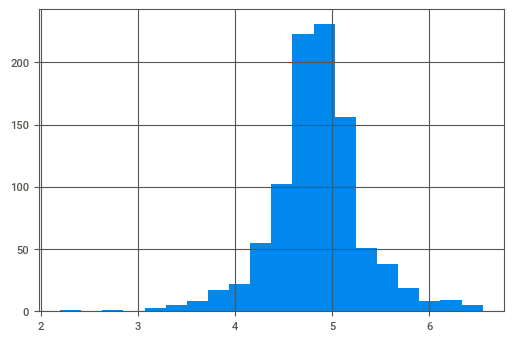

In [51]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [52]:
# Getting missing values
df.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
LoanAmount_log        27
dtype: int64

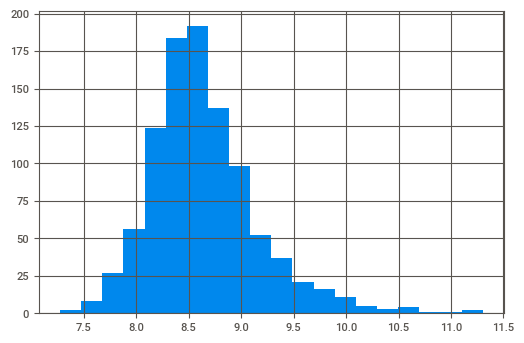

In [53]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [54]:
# Imputing the missing values:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['Loan_Status'].fillna(df['Loan_Status'].mode()[0], inplace = True)

In [55]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,4.845892,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [56]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

Number of people who has taken loan by group as gender:
Male      799
Female    182
Name: Gender, dtype: int64


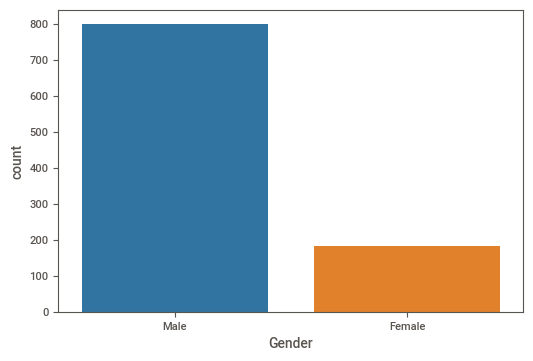

In [57]:
# Countplot showing number of people who has taken loan by group as gender
print("Number of people who has taken loan by group as gender:")
print(df['Gender'].value_counts())
sns.countplot('Gender',palette='tab10',data=df)

***Observation:-***  Number of people who has taken loan by group as gender: **Male** - 799 & **Female** - 182

Number of people who take loan as per their marital status:
Yes    634
No     347
Name: Married, dtype: int64


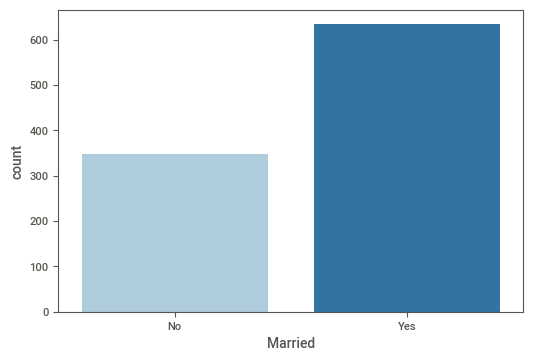

In [58]:
# Countplot showing number of people who take loan as per their marital status
print("Number of people who take loan as per their marital status:")
print(df['Married'].value_counts())
sns.countplot('Married',palette='Paired',data=df)

Number of people who take loan as per their Education:
Graduate        763
Not Graduate    218
Name: Education, dtype: int64


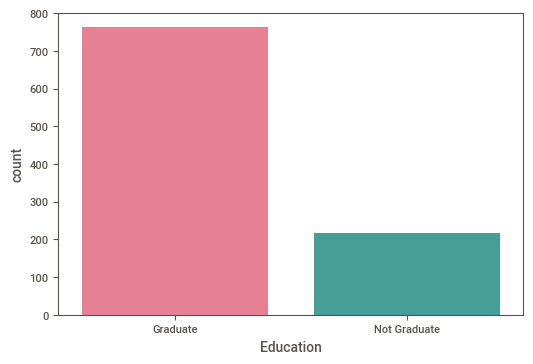

In [59]:
# Countplot showing number of people who take loan as per their Education
print("Number of people who take loan as per their Education:")
print(df['Education'].value_counts())
sns.countplot('Education',palette='husl',data=df)

Number of people who take loan as per their Employment status:
No     862
Yes    119
Name: Self_Employed, dtype: int64


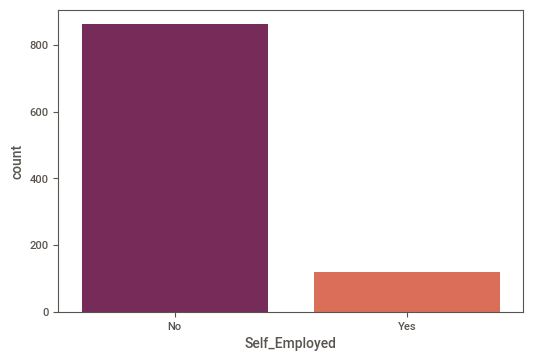

In [60]:
# Countplot showing number of people who take loan as per their Employment status
print("Number of people who take loan as per their Employment status:")
print(df['Self_Employed'].value_counts())
sns.countplot('Self_Employed',palette='rocket',data=df)

Number of people who take loan as group by dependents:
0     570
1     160
2     160
3+     91
Name: Dependents, dtype: int64


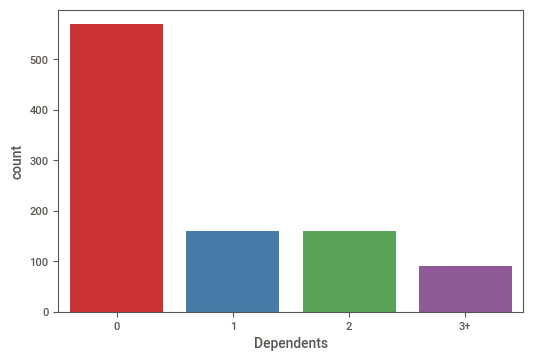

In [61]:
# Countplot showing number of people who take loan as per their Employment status
print("Number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot('Dependents',palette='Set1',data=df)

Number of people who take loan as per Loan Amount:
120.00000    29
142.51153    27
110.00000    27
100.00000    24
187.00000    21
             ..
218.00000     1
62.00000      1
53.00000      1
242.00000     1
197.00000     1
Name: LoanAmount, Length: 233, dtype: int64


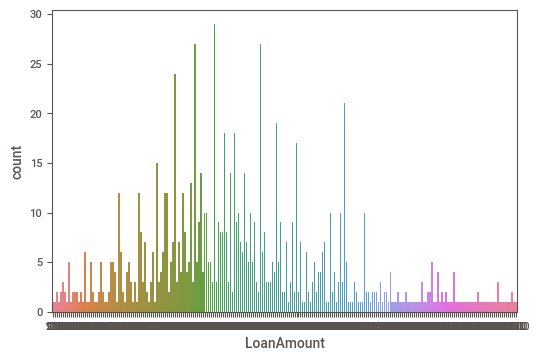

In [63]:
# Countplot showing number of people who take loan as per Loan Amount
print("Number of people who take loan as per Loan Amount:")
print(df['LoanAmount'].value_counts())
sns.countplot('LoanAmount',palette='husl',data=df)

Number of people who take loan as group by their Credit History:
1.0    833
0.0    148
Name: Credit_History, dtype: int64


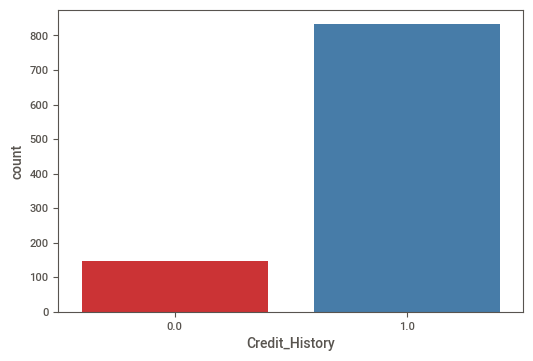

In [65]:
# Countplot showing number of people who take loan as group by their Credit History
print("Number of people who take loan as group by their Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot('Credit_History',palette='Set1',data=df)

# **Part Two**

### *Auto ML wth autosklearn*

# ***Feature Scaling***

In [67]:
# Matrix of features

X = df_train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = df_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8)

# imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [69]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7967479674796748


In [70]:
print(confusion_matrix(predictions_autoML, y_test))

[[19  1]
 [24 79]]


# **Bespoke ML sklearn**

### *Data Preparation*

In [80]:
# Matrix of features

df = df_train[['Education',
'Property_Area']]

# label encode target
y = df_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [77]:
# train
clf = LogisticRegression() 
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [78]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.6504065040650406


In [79]:
print(confusion_matrix(predictions_clf, y_test))

[[ 0  0]
 [43 80]]
